### Load and Sampling Data

In [1]:
import numpy as np
import SRC.EDA as EDA
main = EDA.EDA(force_file=False)
main.read_data("SAMPLES/LARGE/HTRU_2.csv",label_cols=-1,normalize_labels=True)

print("No. of samples : ",main.n_samples,"\nNo. of Features : ",main.n_features)
print("No. of Classes :",np.unique(main.class_labels).shape[0])
print("Class Distribution : ",*np.bincount(main.class_labels))

No. of samples :  17898 
No. of Features :  8
No. of Classes : 2
Class Distribution :  16259 1639


In [2]:
#form 10 bags of randomly choosen points of size 1000
#main.repeated_sampling("htru_bag",n_iterations=10,size=1000)

In [3]:
import pickle
samples_bag = pickle.load(open("DATASETS/htru_bag1.p","rb"))
data, labels = samples_bag["data"], samples_bag["target"]
cluster_data = EDA.EDA(force_file=False)
cluster_data.load_data(data,labels)

In [4]:
#analyse sampled points
print("No. of samples : ",cluster_data.n_samples)
print("No. of Classes :",np.unique(cluster_data.class_labels).shape[0])
print("Class Distribution : ",*np.bincount(cluster_data.class_labels))

No. of samples :  1000
No. of Classes : 2
Class Distribution :  908 92


### K-Means Clustering and Evaluation

In [5]:
cluster_data.perform_kmeans(no_clusters=2)

parameters : {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'random_state': None, 'n_jobs': -1, 'n_init': 10, 'precompute_distances': 'auto', 'verbose': 0, 'max_iter': 300, 'tol': 0.0001, 'copy_x': True}
inertia : 7062414.38036
labels : [1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1


In [6]:
#measure internal metrics for kmeans clustering
import SRC.internal_indices as intval
val_int = intval.internal_indices(cluster_data.data,cluster_data.kmeans_results['labels'])

print("Internal Indices\n")

print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
print("Scott-Symons Index : ",val_int.scott_symons_index())
print("Trace WiB Index : ",val_int.trace_wib_index())
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())
print("Score Function : ",val_int.score_function())

Internal Indices

ball-hall index :  12777.1357395
Banfeld-Raftery index :  8712.10666605
Det Ratio Index :  2.61242229876
Ksq-detw Index  : 1.01000153222e+37
Log-det Ratio Index :  960.2778747459412
Log SS Ratio Index :  0.00012653123066738272
Scott-Symons Index :  24529.3789413
Trace WiB Index :  1.61242229876
Sillhoutte Index :  0.620067458639
Calinski-Harabasz index :  998.126286158
C-index :  0.108867566946
Dunn Index :  0.006365314798089462
Davies Bouldin Index :  0.665961819471
Ray-Turi Index :  0.112344783977
Hartigan Index :  -736.591536462
PBM Index :  26205.4079979
Score Function :  0.0


In [7]:
#measure external metrics for kmeans clustering
import SRC.external_indices as extval
val_ext = extval.external_indices(cluster_data.class_labels,cluster_data.kmeans_results['labels'])

print("External Indices\n")
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("hubert_T_index:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())
print("sokal_sneath_index2:",val_ext.sokal_sneath_index2())

External Indices

entropy: 0.429168038356
precision_coefficient: 0.816325318165733
recall_coefficient: 0.7597604600398111
f_measure: 0.7870278481643123
weighted_f_measure: 0.7870278481643123
purity: 0.908
folkes_mallows_index: 0.7875352051
rand_index: 0.6575795795795796
adjusted_rand_index: -0.0803827899484
adjusted_mutual_information: 0.0238465392415
normalized_mutual_information: 0.0281229149517
homogeneity_score: 0.0314651042022
completness_score: 0.0251357294194
v_measure_score: 0.0279465263945
jaccard_co_eff: 0.6488424709283227
hubert_T_index: -0.08174907300078185
kulczynski_index: 0.788042889102772
mcnemar_index: -203.02675216676255
phi_index: -2.1027111100776523e-12
rogers_tanimoto_index: 0.4898462281835956
sokal_sneath_index1: 0.4802123046112282
sokal_sneath_index2: 0.7934214292702193


### Hierarchial Clustering and its Evaluation

In [8]:
cluster_data.perform_hierarchial(no_clusters=2)

Validated input array ...
Computing condensed distance matrix ...
Initialising Cython Code ...
Finsihed executing Cython code
parameters : {'compute_full_tree': 'auto', 'n_clusters': 2, 'connectivity': None, 'memory': Memory(cachedir=None), 'linkage': 'ward', 'pooling_func': <function mean at 0x7fca280678c8>, 'affinity': 'euclidean'}
labels : [1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 

In [9]:
#measure internal metrics for kmeans clustering
val_int = intval.internal_indices(cluster_data.data,cluster_data.hierarchial_results['labels'])

print("Internal Indices\n")

print("ball-hall index : ",val_int.ball_hall_index())
print("Banfeld-Raftery index : ",val_int.banfeld_raftery_index())
print("Det Ratio Index : ",val_int.det_ratio_index())
print("Ksq-detw Index  :",val_int.ksq_detw_index())
print("Log-det Ratio Index : ",val_int.log_det_ratio_index())
print("Log SS Ratio Index : ",val_int.log_ss_ratio_index())
print("Scott-Symons Index : ",val_int.scott_symons_index())
print("Trace WiB Index : ",val_int.trace_wib_index())
print("Sillhoutte Index : ",val_int.silhouette_score())
print("Calinski-Harabasz index : ",val_int.calinski_harabaz_score())
print("C-index : ",val_int.c_index())
print("Dunn Index : ",val_int.dunn_index())
print("Davies Bouldin Index : ",val_int.davies_bouldin_index())
print("Ray-Turi Index : ",val_int.ray_turi_index())
print("Hartigan Index : ",val_int.hartigan_index())
print("PBM Index : ",val_int.pbm_index())
print("Score Function : ",val_int.score_function())

Internal Indices

ball-hall index :  12353.3494317
Banfeld-Raftery index :  8702.47543636
Det Ratio Index :  2.52049435541
Ksq-detw Index  : 1.04683849773e+37
Log-det Ratio Index :  924.4550550657779
Log SS Ratio Index :  -0.031447694086663945
Scott-Symons Index :  23880.6656822
Trace WiB Index :  1.52049435541
Sillhoutte Index :  0.59076702371
Calinski-Harabasz index :  967.103558453
C-index :  0.130583178907
Dunn Index :  0.011646983450982303
Davies Bouldin Index :  0.709335120691
Ray-Turi Index :  0.135870322109
Hartigan Index :  -732.45113725
PBM Index :  22235.6448845
Score Function :  0.0


In [10]:
#measure external metrics for kmeans clustering
import SRC.external_indices as extval
val_ext = extval.external_indices(cluster_data.class_labels,cluster_data.hierarchial_results['labels'])

print("External Indices\n")
print("entropy:",val_ext.entropy())
print("precision_coefficient:",val_ext.precision_coefficient())
print("recall_coefficient:",val_ext.recall_coefficient())
print("f_measure:",val_ext.f_measure())
print("weighted_f_measure:",val_ext.weighted_f_measure())
print("purity:",val_ext.purity())
print("folkes_mallows_index:",val_ext.folkes_mallows_index())
print("rand_index:",val_ext.rand_index())
print("adjusted_rand_index:",val_ext. adjusted_rand_index())
print("adjusted_mutual_information:",val_ext.adjusted_mutual_information())
print("normalized_mutual_information:",val_ext.normalized_mutual_information())
print("homogeneity_score:",val_ext.homogeneity_score())
print("completness_score:",val_ext.completness_score())
print("v_measure_score:",val_ext.v_measure_score())
print("jaccard_co_eff:",val_ext.jaccard_co_eff())
print("hubert_T_index:",val_ext.hubert_T_index())
print("kulczynski_index:",val_ext. kulczynski_index())
print("mcnemar_index:",val_ext.mcnemar_index())
print("phi_index:",val_ext.phi_index())
print("rogers_tanimoto_index:",val_ext. rogers_tanimoto_index())
print("sokal_sneath_index1:",val_ext.sokal_sneath_index1())
print("sokal_sneath_index2:",val_ext.sokal_sneath_index2())

External Indices

entropy: 0.425072807168
precision_coefficient: 0.8132917930816994
recall_coefficient: 0.719192045465473
f_measure: 0.7633528961469763
weighted_f_measure: 0.7633528961469763
purity: 0.908
folkes_mallows_index: 0.764796043548
rand_index: 0.6286606606606606
adjusted_rand_index: -0.0836800177107
adjusted_mutual_information: 0.0277392958882
normalized_mutual_information: 0.034285196186
homogeneity_score: 0.0407071118962
completness_score: 0.0288763958619
v_measure_score: 0.0337860138238
jaccard_co_eff: 0.617276257526174
hubert_T_index: -0.08719815561601714
kulczynski_index: 0.7662419192735862
mcnemar_index: -186.21165306092638
phi_index: -2.1256019999628004e-12
rogers_tanimoto_index: 0.45842822606075473
sokal_sneath_index1: 0.44642052390147524
sokal_sneath_index2: 0.771997108846046


### Spectral Clustering and Evaluation

Input array validated ...
Computing affinity matrix ...
Performing Spectral Embedding ...
Adjacency matrix checked for symetricity ...
Computing graph laplacian ...
Starting set Diagonal ...
Starting eigsh ...
[ -1.16083659e-03  -2.22044605e-15]
[[-0.00394975  0.02981424]
 [ 0.02620205  0.0341565 ]
 [ 0.05085135  0.03574602]
 ..., 
 [-0.03127015  0.02687419]
 [-0.02980196  0.02788867]
 [-0.04179247  0.0341565 ]]
Finished eigsh ...


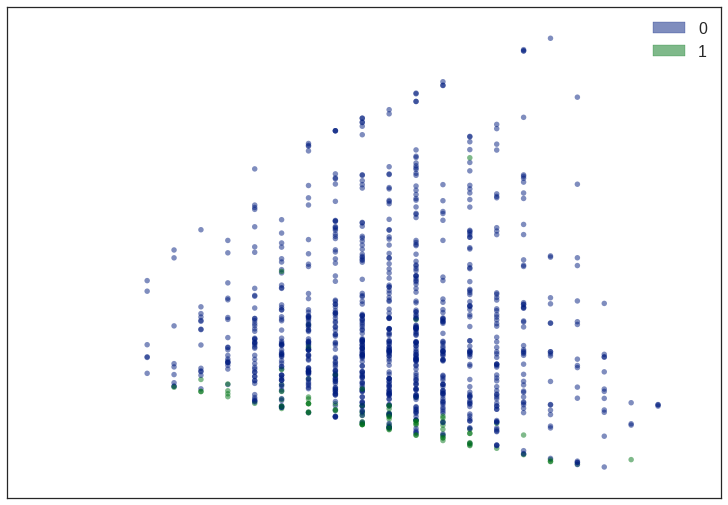

parameters : {'eigen_tol': 0.0, 'gamma': 0.1, 'n_init': 10, 'eigen_solver': None, 'assign_labels': 'kmeans', 'kernel_params': None, 'degree': 3, 'n_neighbors': 10, 'n_jobs': 1, 'n_clusters': 2, 'random_state': None, 'coef0': 1, 'affinity': 'nearest_neighbors'}
labels : [1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 

In [24]:
cluster_data.perform_spectral_clustering(no_clusters=2,affinity='nearest_neighbors',gamma=0.1,pass_labels=True)